In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from math import pi

# Ecoli
df1 = pd.DataFrame(
    {
        "group": ["iML1515", "CarveMe", "Moped"],
        "Overall": [0.91, 0.7, 0.83],
        "Consistency": [0.984, 0.5042, 0.94],
        "Met Annotation": [0.788, 0.8236, 0.7],
        "Rxn Annotation": [0.8086, 0.7754, 0.65],
        "Gene Annotation": [0.633, 0.3333, 0.51],
        "SBO Annotation": [0.908, 0.909, 0.82],
    }
)

# Bacillus subtillis
df2 = pd.DataFrame(
    {
        "group": ["iYO844", "CarveMe", "Moped"],
        "Overall": [0.86, 0.88, 0.83],
        "Consistency": [0.9823, 0.9566, 0.94],
        "Met Annotation": [0.7964, 0.8173, 0.7],
        "Rxn Annotation": [0.8238, 0.7784, 0.65],
        "Gene Annotation": [0.3667, 0.3333, 0.51],
        "SBO Annotation": [0.8182, 0.909, 0.82],
    }
)

# Synechocystis
df3 = pd.DataFrame(
    {
        "group": ["iSynCJ816", "CarveMe", "Moped"],
        "Overall": [0.71, 0.88, 0.82],
        "Consistency": [0.4238, 0.9522, 0.93],
        "Met Annotation": [0.7794, 0.8243, 0.7],
        "Rxn Annotation": [0.8118, 0.7854, 0.65],
        "Gene Annotation": [0.3667, 0.3333, 0.51],
        "SBO Annotation": [1.0, 0.909, 0.81],
    }
)

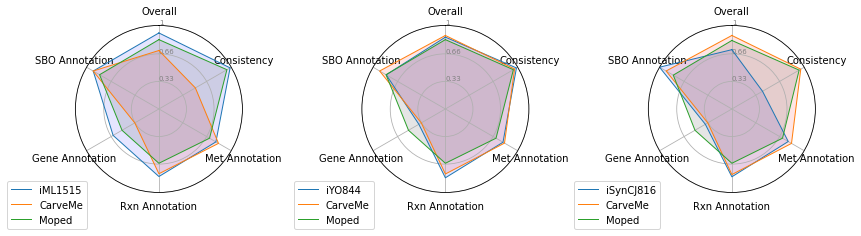

In [2]:
def plot_radar(ax, df, model_name):
    categories = list(df)[1:]
    N = len(categories)
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    # Initialise the spider plot
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    # Draw one axe per variable + add labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    # Draw ylabels
    ax.set_rlabel_position(0)
    ax.set_yticks([0.33, 0.66, 1])
    ax.set_yticklabels(["0.33", "0.66", "1"], color="grey", size=7)
    ax.set_ylim(0, 1)

    # Ind1
    values = df.loc[0].drop("group").values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle="solid", label=model_name)
    ax.fill(angles, values, "b", alpha=0.1)

    # Ind2
    values = df.loc[1].drop("group").values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle="solid", label="CarveMe")
    ax.fill(angles, values, "r", alpha=0.1)

    values = df.loc[2].drop("group").values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle="solid", label="Moped")
    ax.fill(angles, values, "k", alpha=0.1)
    # Add legend
    ax.legend(loc="upper right", bbox_to_anchor=(0.1, 0.1))
    return ax


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, subplot_kw={"polar": True}, figsize=(12, 4))
plot_radar(ax1, df1, "iML1515")
plot_radar(ax2, df2, "iYO844")
plot_radar(ax3, df3, "iSynCJ816")
fig.tight_layout()
plt.savefig("../figures/radar_plots.pdf", bbox_inches="tight")